In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

from mylib.new_energy_plant import DataSet
from mylib import post_plot
import os

plt.rcParams["font.family"] = "SimSun"
plt.rcParams["axes.unicode_minus"] = False

os.environ["MYLIB_DATASETS_DIR"] = "../dataset/data"
IMG_DIR = Path("../output/imgs")
if not IMG_DIR.exists():
    IMG_DIR.mkdir()
plot_kw = dict(show=True, save=True, img_dir=IMG_DIR / "wavelet")
plt.rc("figure", figsize=(30, 6))

In [2]:
# DWT
import pywt

dfs = [ds.load_dataframe() for ds in DataSet]

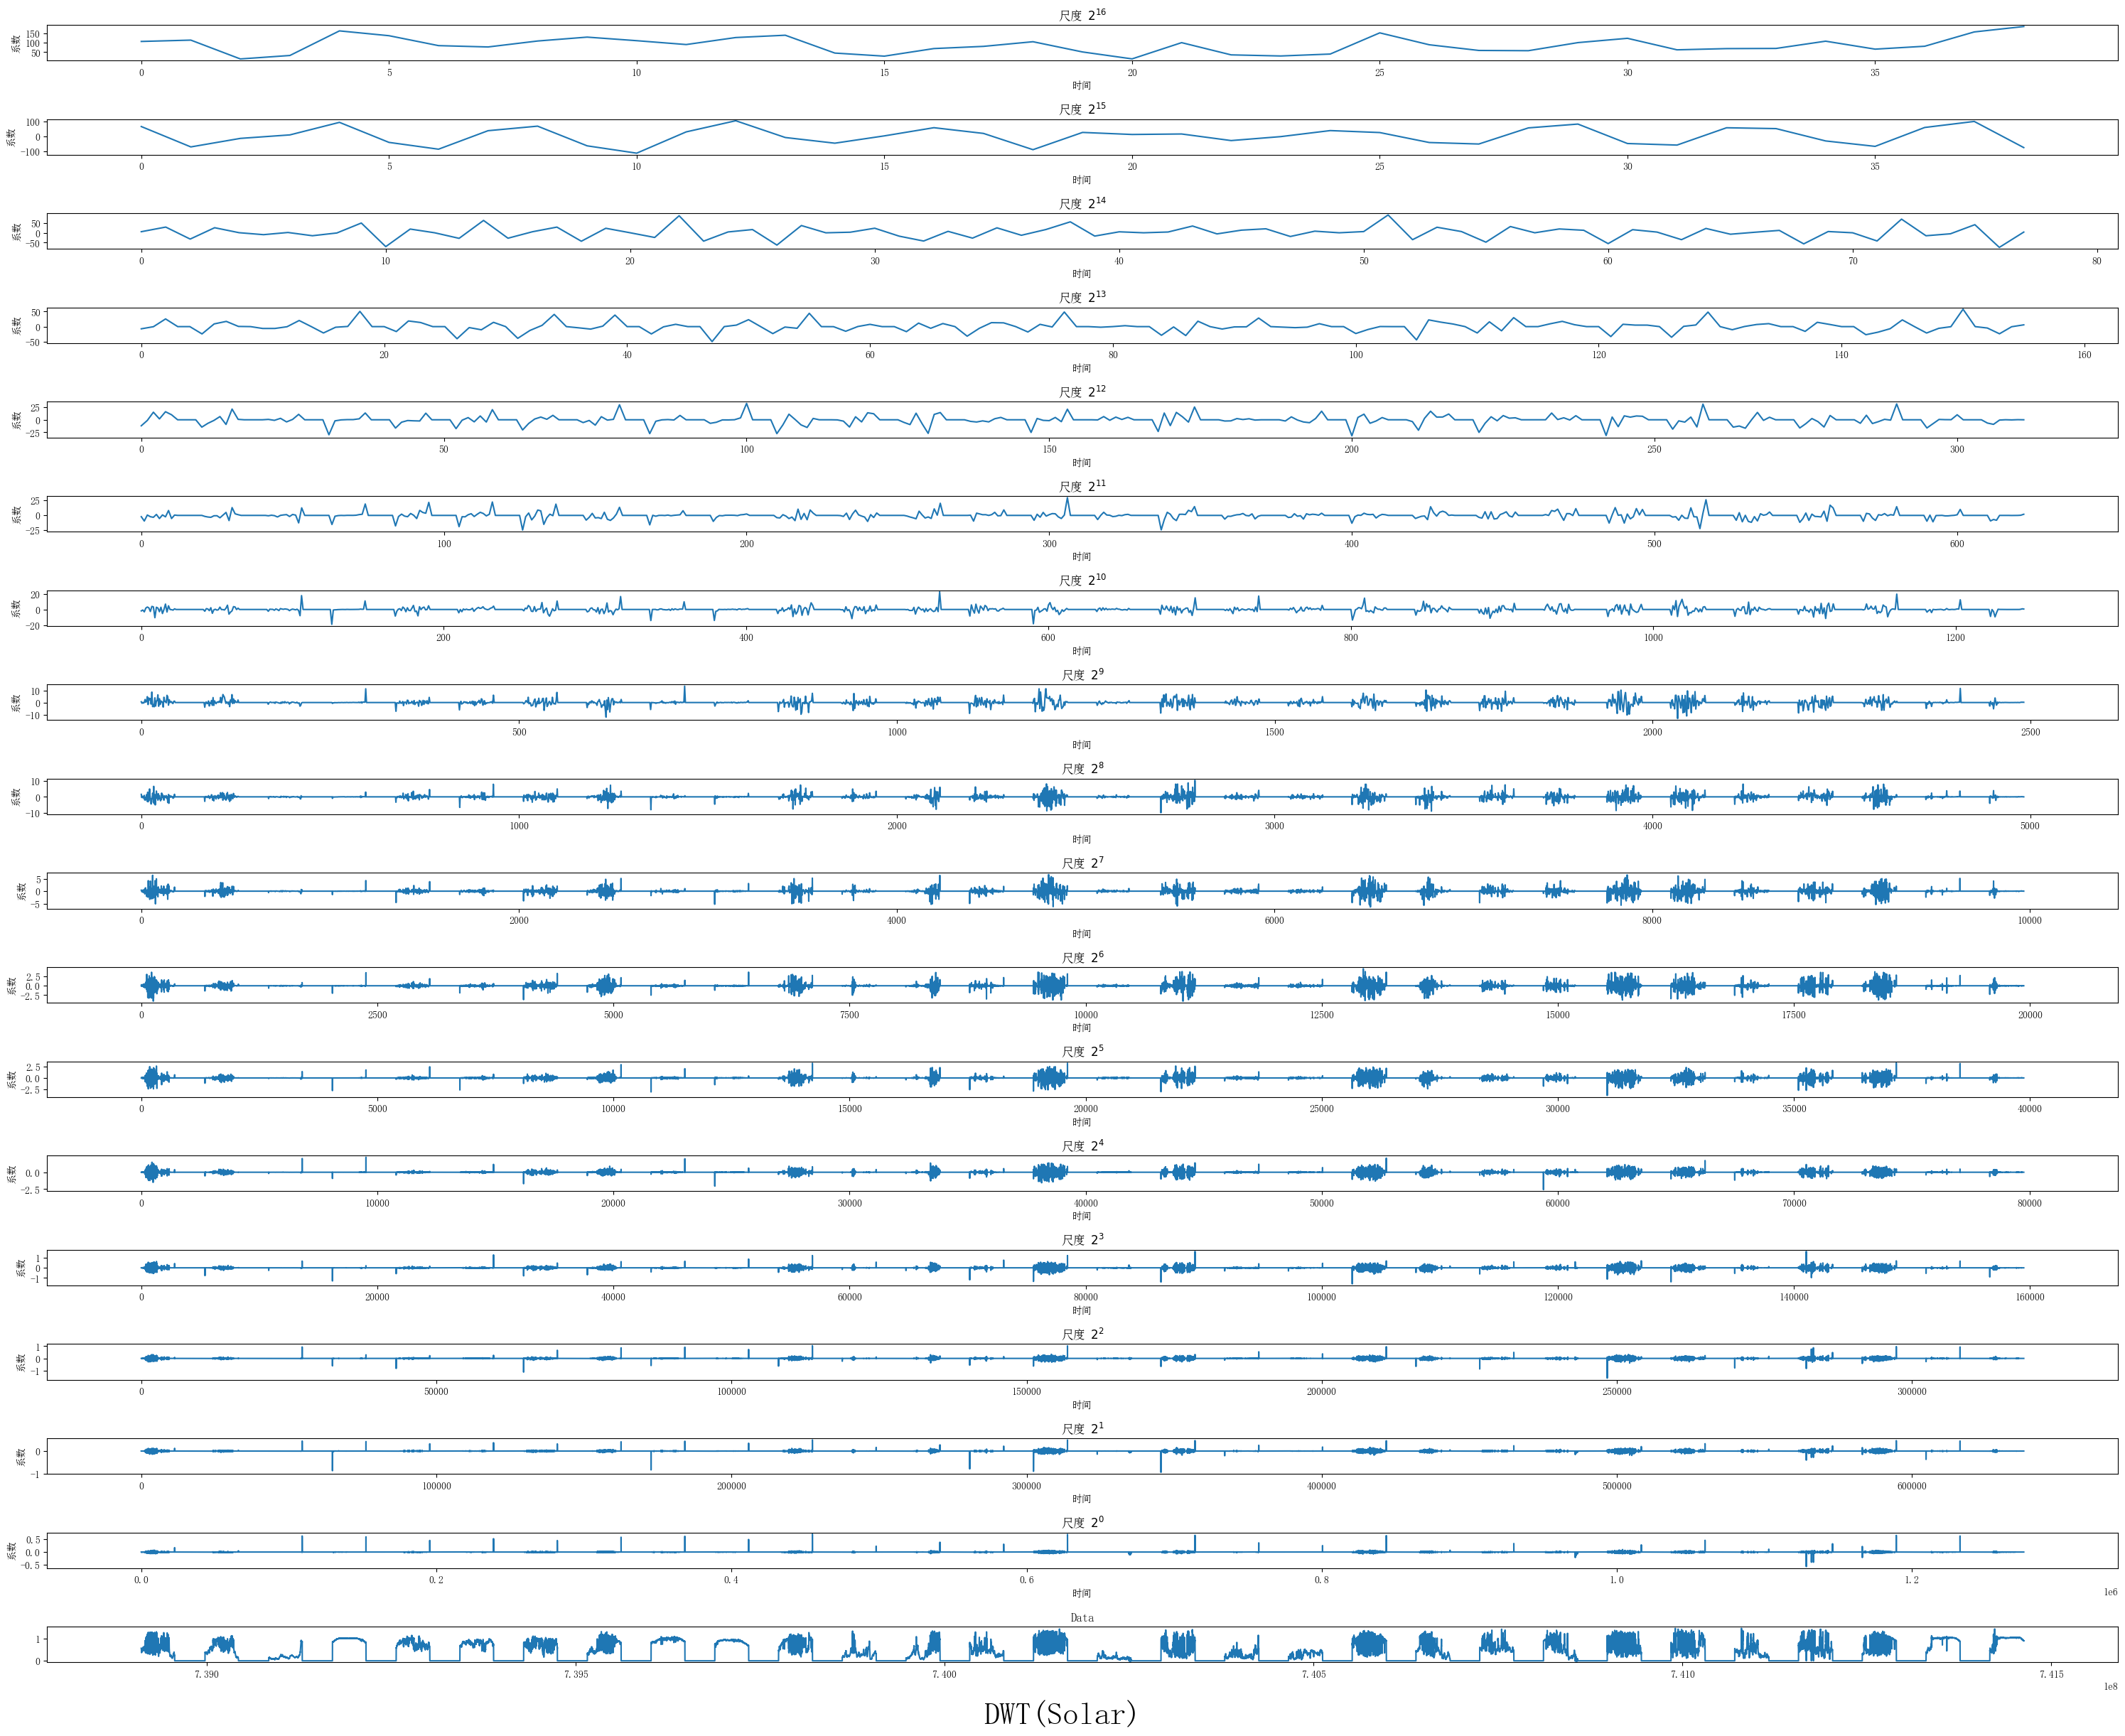

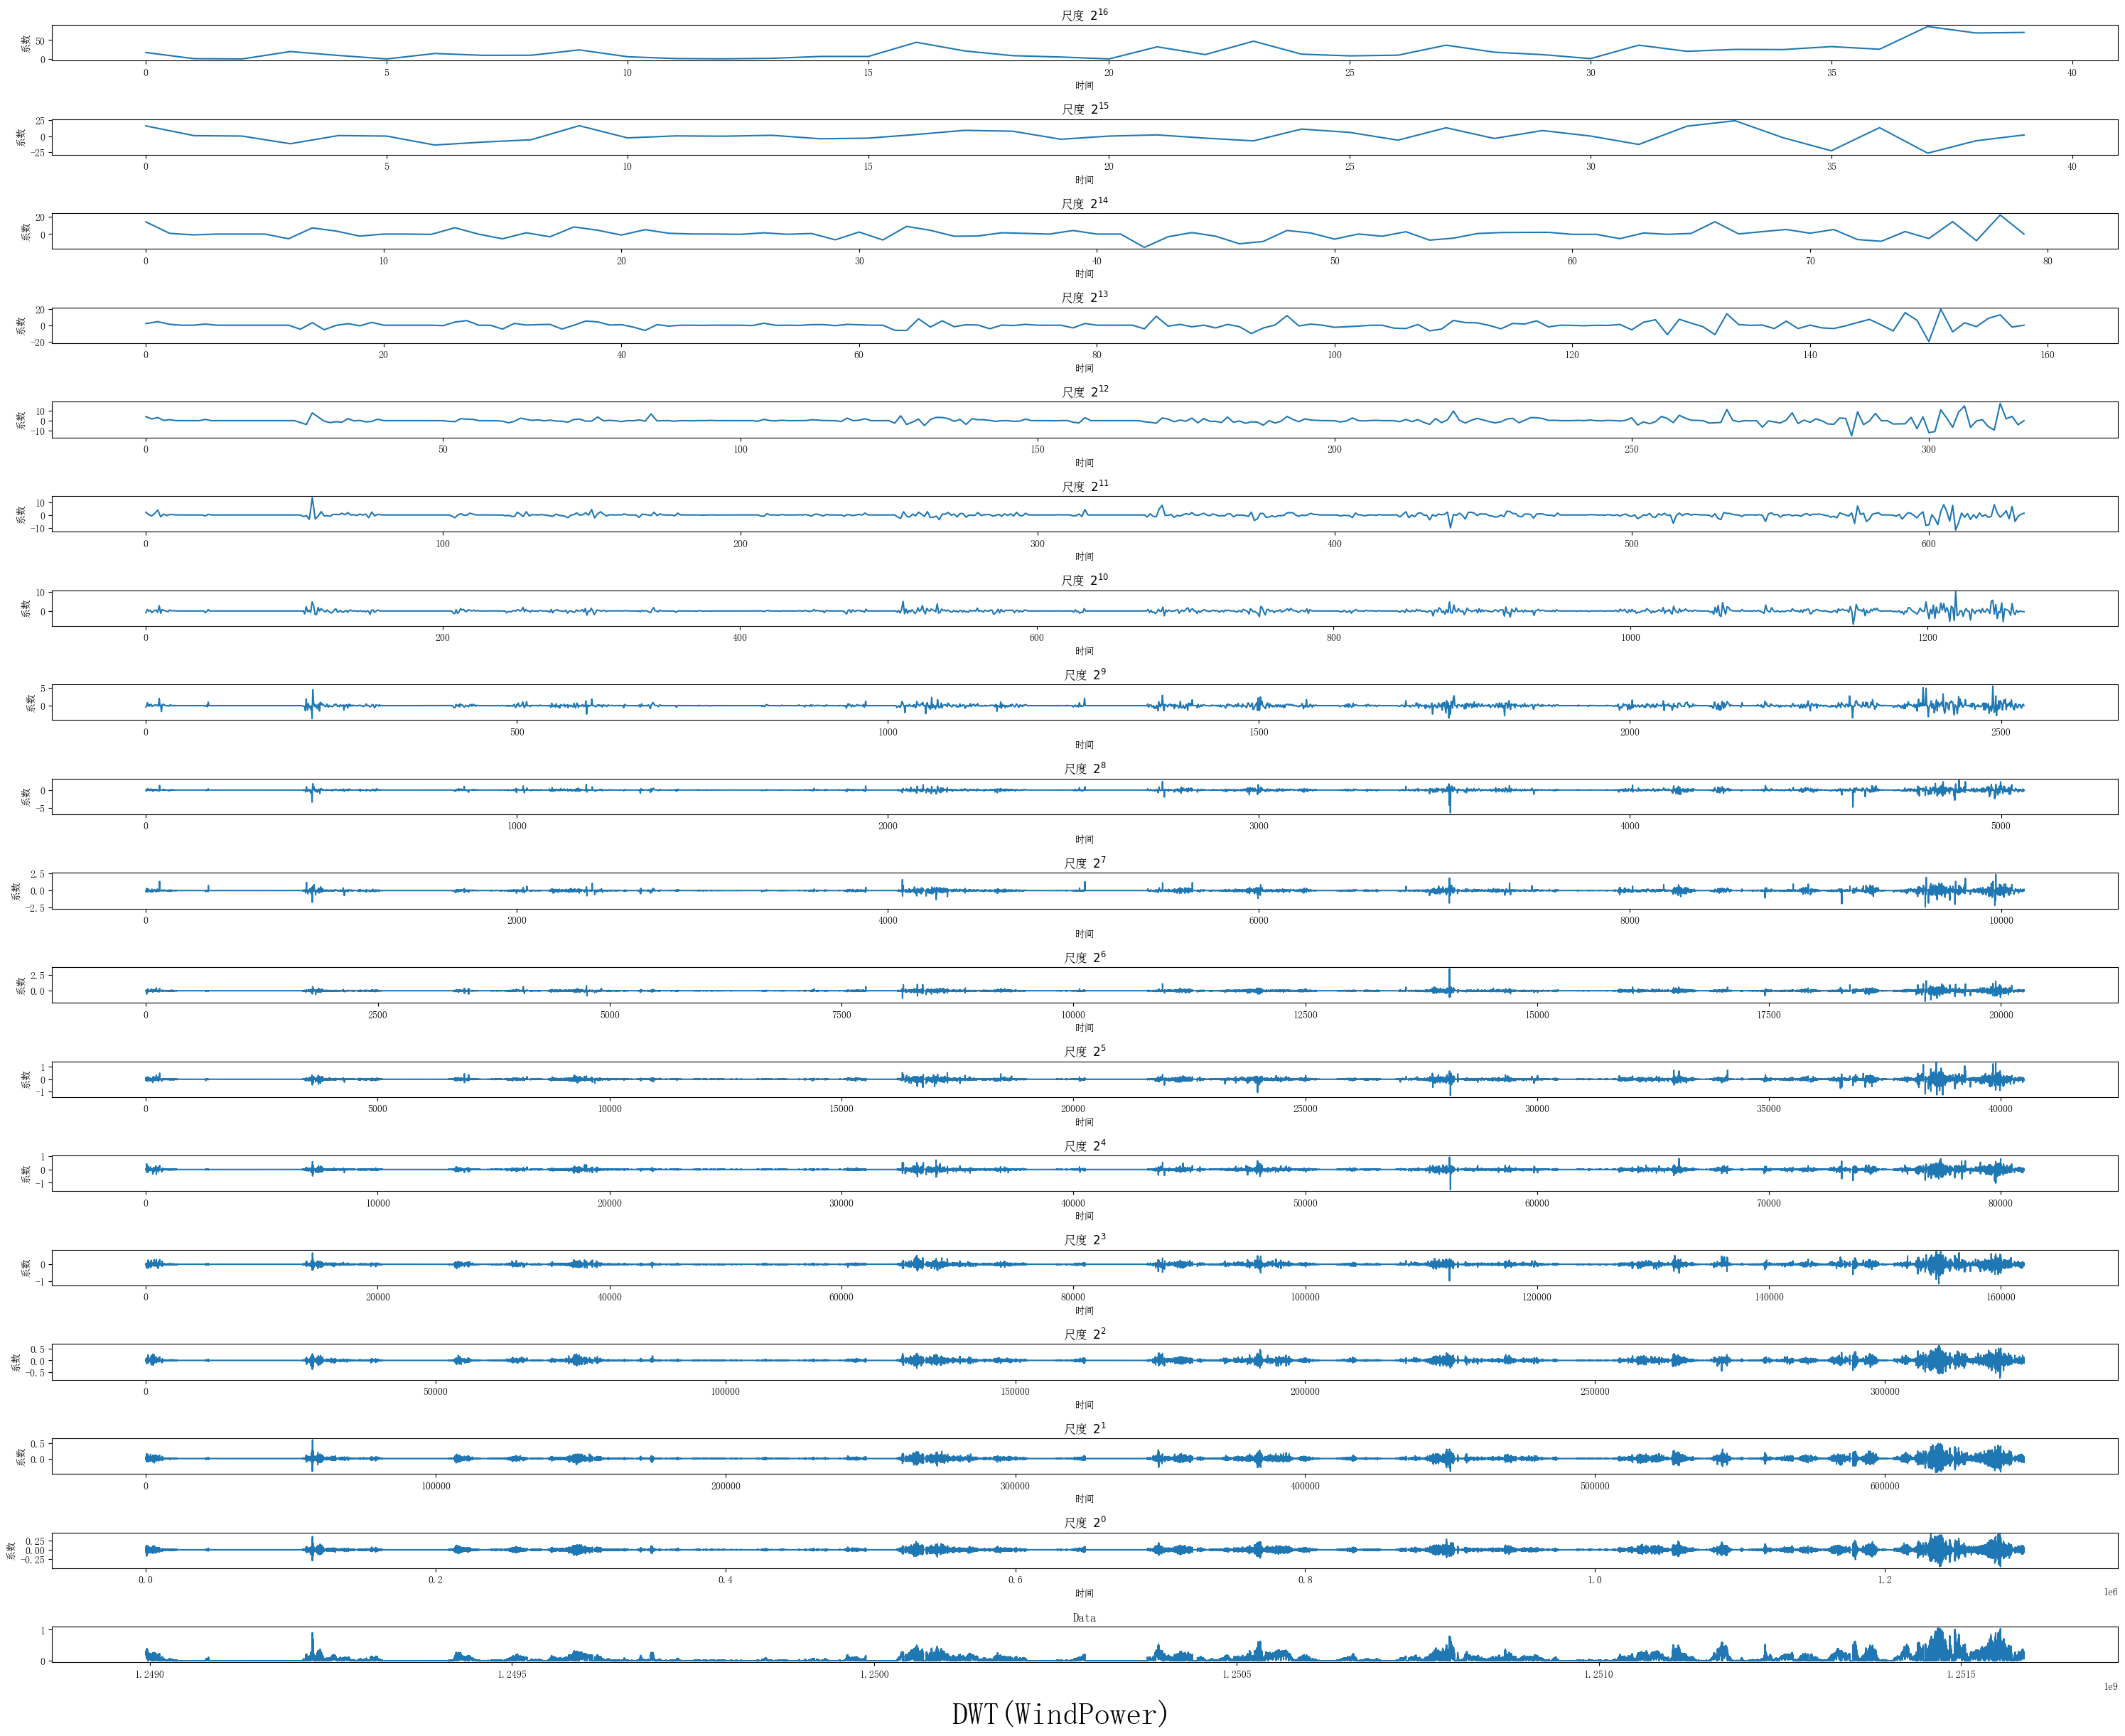

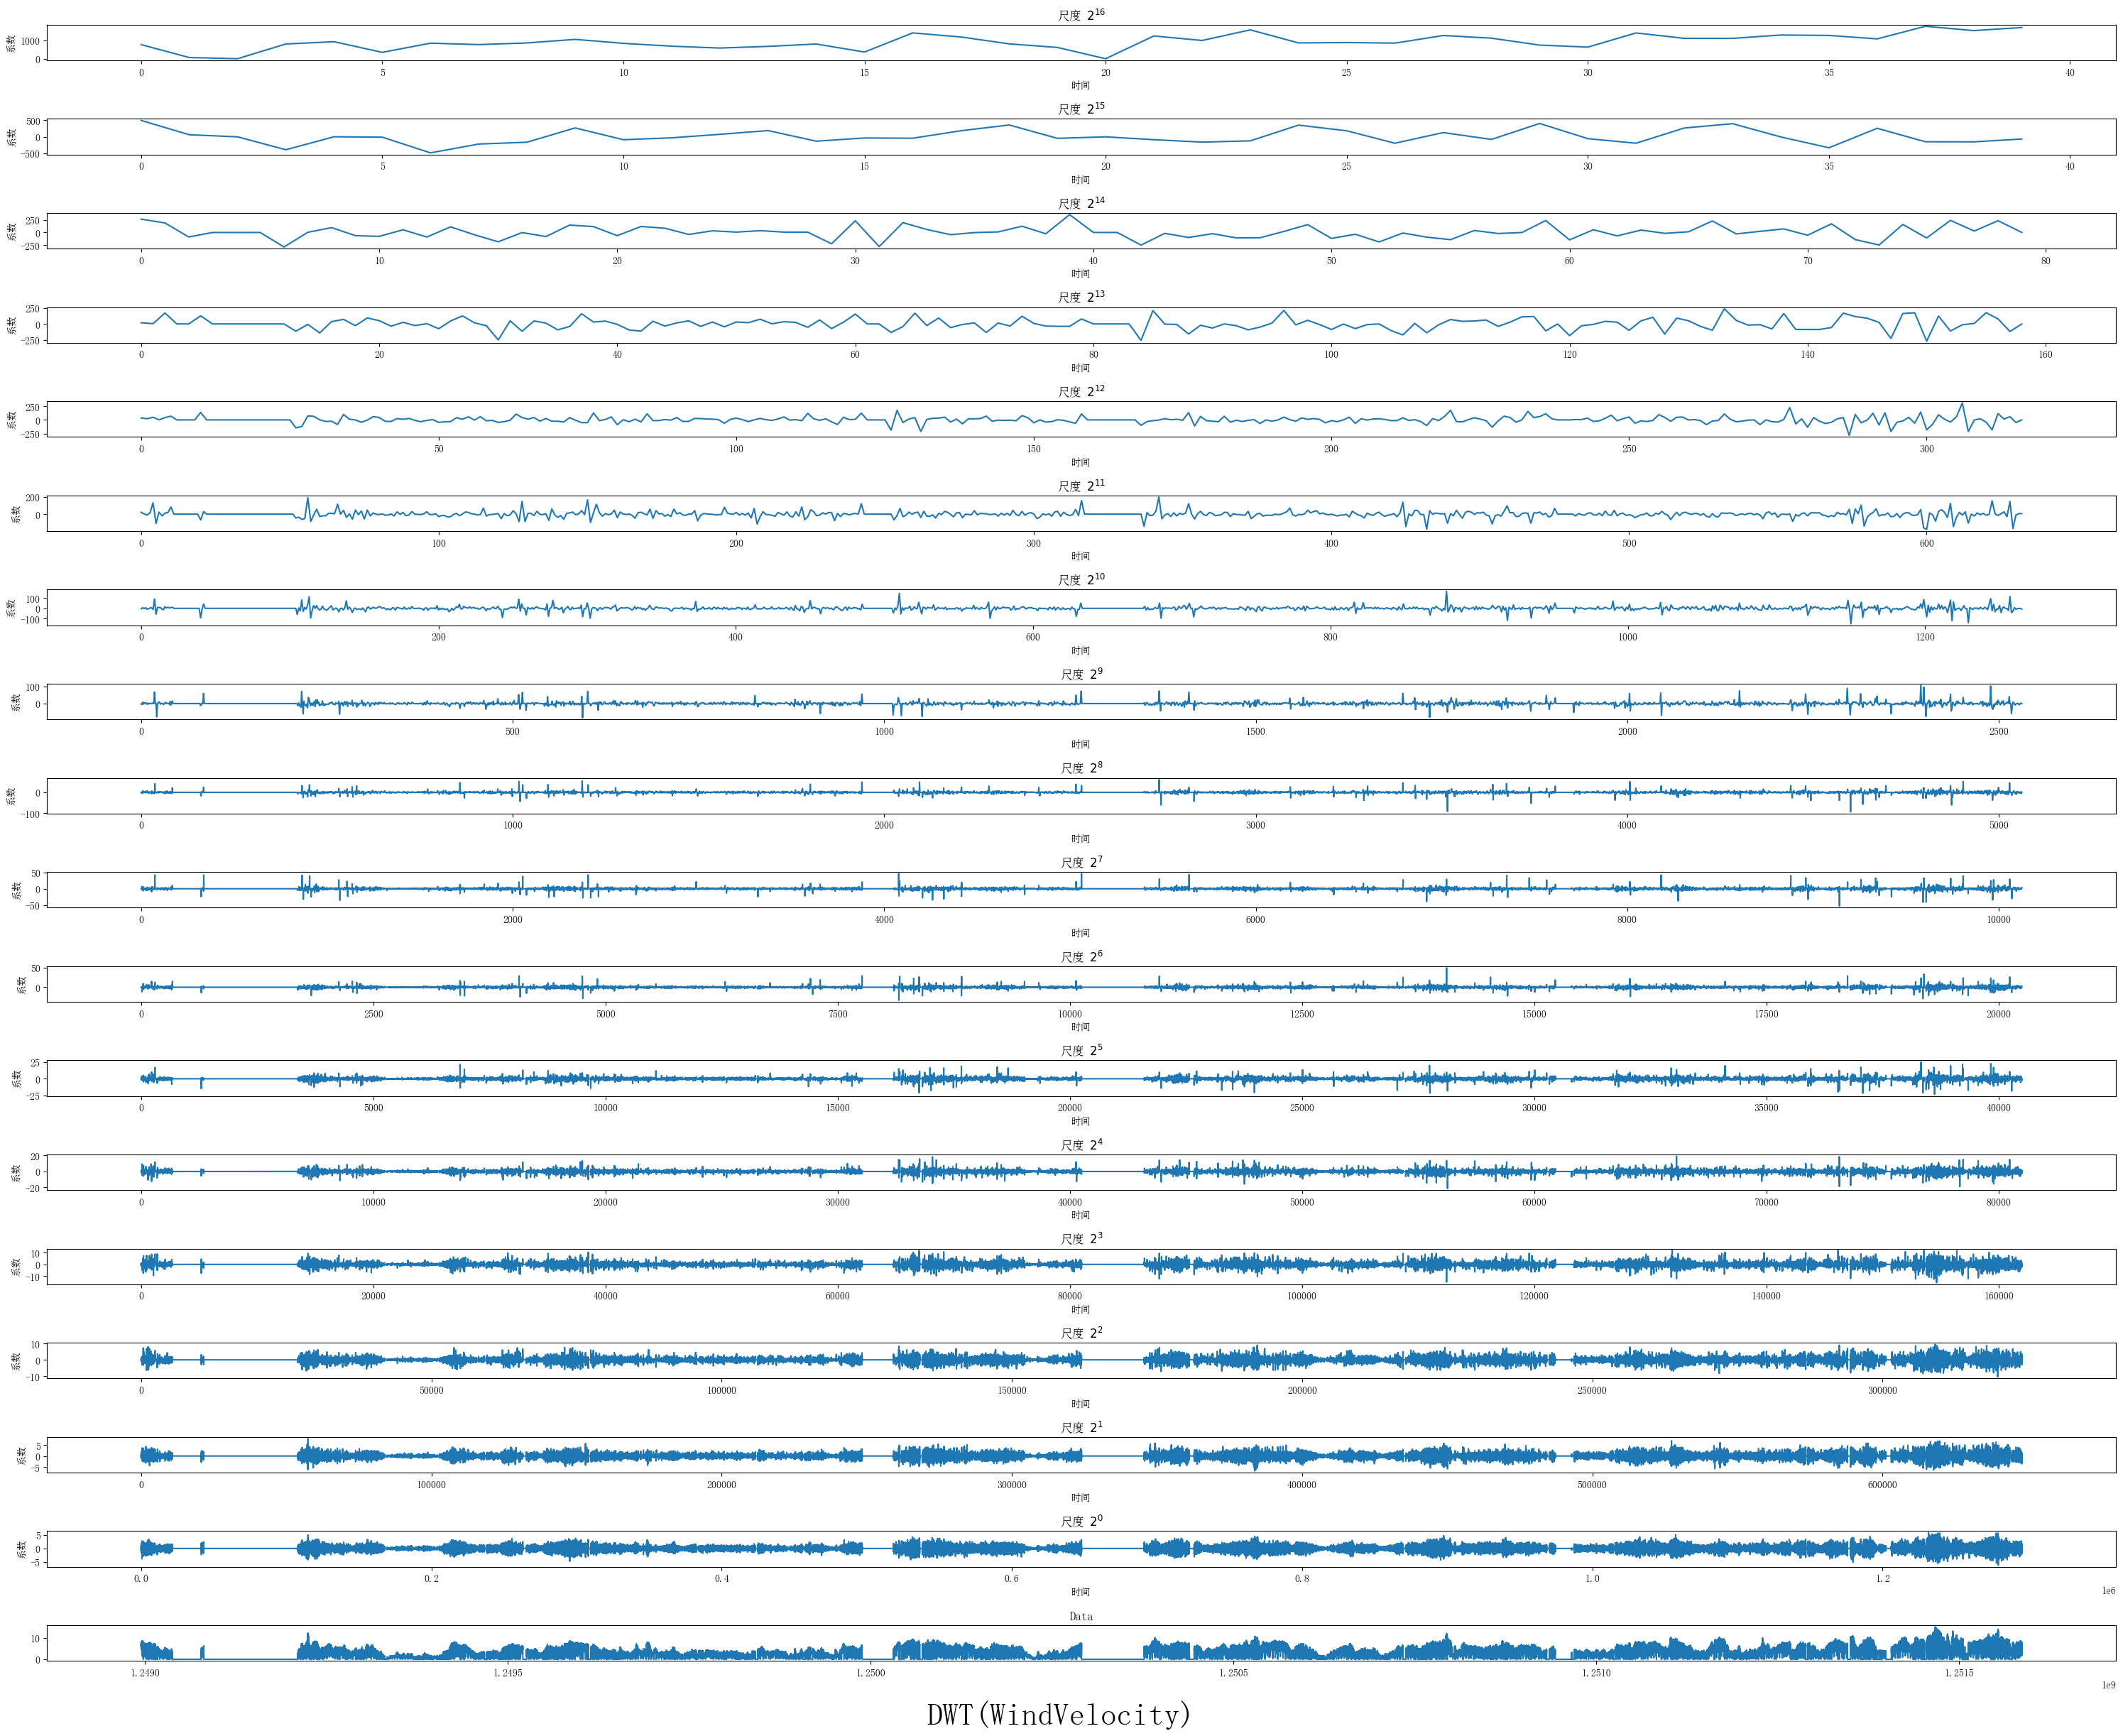

In [3]:
for ds, df in zip(DataSet, dfs):
    ts = df.loc[:, "value"]
    wavelet = "db1"
    level = int(np.log2(24 * 60 * 60))
    coeffs = pywt.wavedec(ts, wavelet=wavelet, level=level)

    plt.figure(figsize=(30, 24))
    for i, coeff in enumerate(coeffs):
        ax = plt.subplot(level + 2, 1, i + 1)
        ax.plot(coeff)
        ax.set_title(f"尺度 $2^{{{level - i}}}$")
        ax.set_xlabel("时间")
        ax.set_ylabel("系数")
    plt.subplot(level + 2, 1, level + 2)
    plt.plot(ts)
    plt.title("Data")
    plt.tight_layout()
    plt.suptitle(f"DWT({ds.name})", fontsize=32, y=0)
    post_plot(**plot_kw)